In [ ]:
# Credit Risk Prediction with Random Forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv("credit_risk_sample.csv")  # Make sure this file is uploaded to Colab

# Features and target
X = df.drop("Default", axis=1)
y = df["Default"]

# Define categorical and numerical columns
categorical_cols = ["Employment_Status", "Loan_Purpose"]
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Model pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Predict for a new applicant
new_applicant = pd.DataFrame([{
    'Age': 30,
    'Income': 5500,
    'Employment_Status': 'Employed',
    'Loan_Amount': 2500,
    'Loan_Purpose': 'Car',
    'Credit_Score': 670,
    'Previous_Defaults': 0,
    'Loan_Term_Months': 24
}])

prediction = pipeline.predict(new_applicant)
print("\n🔍 Default Risk Prediction for New Applicant:", "Default" if prediction[0] == 1 else "No Default")

📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


🔍 Default Risk Prediction for New Applicant: No Default


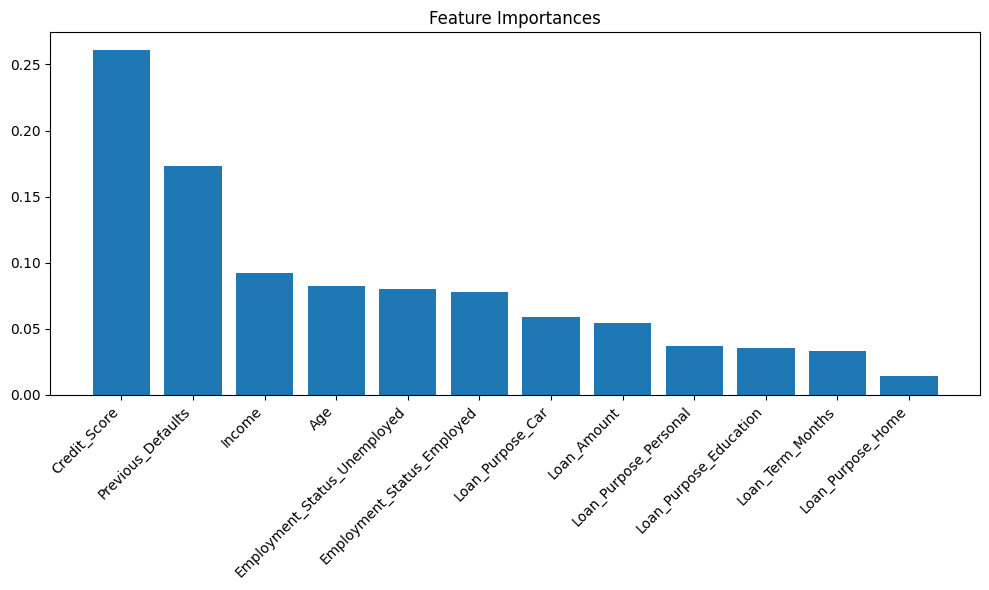

In [ ]:
# Extract trained RandomForest model
rf_model = pipeline.named_steps["classifier"]

# Get feature names after OneHotEncoding
encoded_feature_names = pipeline.named_steps["preprocessor"].transformers_[0][1].get_feature_names_out(categorical_cols)
all_feature_names = list(encoded_feature_names) + numerical_cols

# Plot
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [all_feature_names[i] for i in indices], rotation=45, ha="right")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()